In [1]:
# Gale take home with NYC green taxi data (Feb 2016, 237MB)
'''
tasks:
1. Download the data, load it into your favorite statistical programing software or database.
Report the number of rows and columns that you've loaded.

2. Visualize trip distance by time in any way you see fit, any observations?

4. What are the most popular pickup locations on weekdays vs weekend?

5. Build a model to forecast the number of trips by hour for the next 12 hours after Feb 12th 10:00 am. How well did you do?
 
'''

"\ntasks:\n1. Download the data, load it into your favorite statistical programing software or database.\nReport the number of rows and columns that you've loaded.\n\n2. Visualize trip distance by time in any way you see fit, any observations?\n\n4. What are the most popular pickup locations on weekdays vs weekend?\n\n5. Build a model to forecast the number of trips by hour for the next 12 hours after Feb 12th 10:00 am. How well did you do?\n \n"

In [2]:
import numpy as np
import pandas as pd

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
raw_data = pd.read_csv("green_tripdata_2016-02.csv")
print(raw_data.shape)

(1510722, 21)


In [54]:
raw_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [55]:
raw_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,...,13.0,0.5,0.5,0.00,0.0,NaN,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,...,17.5,0.5,0.5,3.76,0.0,NaN,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,...,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [56]:
raw_data.Trip_distance.describe()

count    1.510722e+06
mean     2.733117e+00
std      2.844410e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.800000e+00
75%      3.440000e+00
max      2.355000e+02
Name: Trip_distance, dtype: float64

In [57]:
raw_data.lpep_pickup_datetime.describe()

count                 1510722
unique                1067848
top       2016-02-28 00:00:00
freq                        8
Name: lpep_pickup_datetime, dtype: object

In [58]:
raw_data.Lpep_dropoff_datetime.describe()

count                 1510722
unique                1065647
top       2016-02-13 00:00:00
freq                      162
Name: Lpep_dropoff_datetime, dtype: object

In [59]:
length_of_trip = []
type(raw_data.lpep_pickup_datetime[0])

str

In [60]:
# convert str to timestamps
raw_data['lpep_pickup_datetime'] = pd.to_datetime(raw_data.lpep_pickup_datetime)
raw_data['Lpep_dropoff_datetime'] = pd.to_datetime(raw_data.Lpep_dropoff_datetime)
#make new column named lenght_of_trip by substracting pickup time from dropoff time
raw_data['lenght_of_trip'] = raw_data['Lpep_dropoff_datetime'] - raw_data['lpep_pickup_datetime'] 

In [61]:
# describtion of the trip lenght column
raw_data.lenght_of_trip.describe()

count                   1510722
mean     0 days 00:21:15.117115
std      0 days 01:48:07.881608
min             0 days 00:00:00
25%             0 days 00:05:45
50%             0 days 00:09:44
75%             0 days 00:16:18
max             0 days 23:59:57
Name: lenght_of_trip, dtype: object

In [62]:
# convert Timedelta to seconds for easier calculation
raw_data['lenght_of_trip'] = raw_data['lenght_of_trip'] / np.timedelta64(1, 's')

In [66]:
raw_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,lenght_of_trip
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,...,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0,605.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,...,0.5,0.5,0.00,0.0,NaN,0.3,14.30,2,1.0,1120.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,...,0.5,0.5,3.76,0.0,NaN,0.3,22.56,1,1.0,1038.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,...,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0,403.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,147.0


In [93]:
plt.scatter(raw_data['lenght_of_trip'].sample(30), raw_data['Trip_distance'].sample(30))
plt.xlabel("length of trips in Seconds")
plt.ylabel("Trip Distance In Miles")
# in general the distance and time have a positive correalation

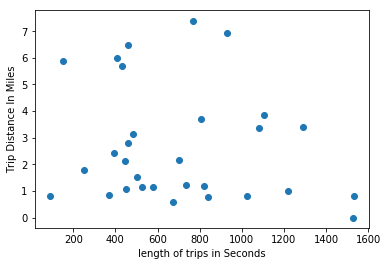

In [94]:
plt.show()

In [105]:
# add Weekday columns , 0 being Monday, 6 being Sunday
raw_data['Weekday'] = raw_data['lpep_pickup_datetime'].dt.dayofweek

In [108]:
# split data in to weekdays & weekends
weekday_data = raw_data[raw_data['Weekday']<5]
weekday_data.shape

(1018454, 23)

In [109]:
weekend_data = raw_data[raw_data['Weekday']>5]
weekend_data.shape

(223052, 23)

In [ ]:
weekday_data.to_excel('weekday_data.xlsx')
weekend_data.to_excel('weekend_data.xlsx')